# logistic regression part 2: electric boogaloo

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

## data retrieval

In [2]:
data = scipy.io.loadmat("data/logistic_gn.mat")

t: np.ndarray = data["t"].reshape(-1)
y: np.ndarray = data["y"].reshape(-1)

## derivatives n such

we have
$$
\frac{d}{d\alpha} \left(\frac{\exp(\alpha t_i + \beta)}{1+\exp(\alpha t_i + \beta)}-y_i\right)
= \frac{t_i\exp(\alpha t_i + \beta)}{\left(1+\exp(\alpha t_i + \beta)\right)^2}
$$
and
$$
\frac{d}{d\beta} \left(\frac{\exp(\alpha t_i + \beta)}{1+\exp(\alpha t_i + \beta)}-y_i\right)
= \frac{\exp(\alpha t_i + \beta)}{\left(1+\exp(\alpha t_i + \beta)\right)^2}
$$

In [3]:
def cost(a: float, b: float) -> float:
    return 1 - 1 / (1 + np.exp(a * t + b)) - y


def jacobian(a: float, b: float) -> np.ndarray:
    exp = np.exp(a * t + b)
    dda = t * exp / (1 + exp) ** 2
    ddb = exp / (1 + exp) ** 2
    return np.column_stack([dda, ddb])

## solving

In [4]:
alpha, beta = 0, 0

for _ in range(1000):
    slope = jacobian(alpha, beta)
    bias = cost(alpha, beta) - slope @ [alpha, beta]
    alpha, beta = np.linalg.lstsq(slope, -bias)[0]

## display

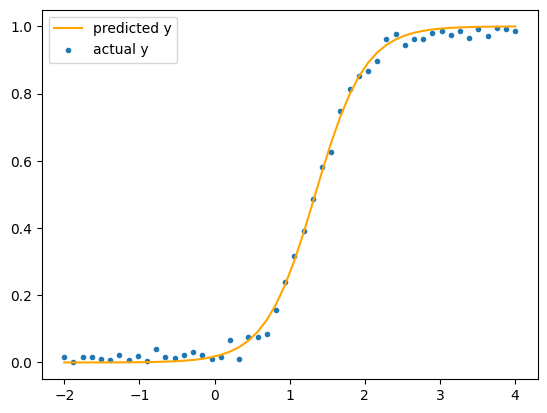

In [5]:
exp_ab = np.exp(alpha * t + beta)
pred_y = exp_ab / (1 + exp_ab)

sorted_t = np.argsort(t)
plt.plot(t[sorted_t], pred_y[sorted_t], label="predicted y", color="orange")
plt.scatter(t, y, label="actual y", marker=".")
plt.legend()